# Data Science Salaries and Jobs Analysis

In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv("jobs_in_data.csv")

# Display the first few rows of the dataframe
df

,work_year,job_title,job_category,salary_currency,salary,salary_in_usd,employee_residence,experience_level,employment_type,work_setting,company_location,company_size
0,2023,Data DevOps Engineer,Data Engineering,EUR,88000,95012,Germany,Mid-level,Full-time,Hybrid,Germany,L
1,2023,Data Architect,Data Architecture and Modeling,USD,186000,186000,United States,Senior,Full-time,In-person,United States,M
2,2023,Data Architect,Data Architecture and Modeling,USD,81800,81800,United States,Senior,Full-time,In-person,United States,M
3,2023,Data Scientist,Data Science and Research,USD,212000,212000,United States,Senior,Full-time,In-person,United States,M
4,2023,Data Scientist,Data Science and Research,USD,93300,93300,United States,Senior,Full-time,In-person,United States,M
...,...,...,...,...,...,...,...,...,...,...,...,...
9350,2021,Data Specialist,Data Management and Strategy,USD,165000,165000,United States,Senior,Full-time,Remote,United States,L
9351,2020,Data Scientist,Data Science and Research,USD,412000,412000,United States,Senior,Full-time,Remote,United States,L
9352,2021,Principal Data Scientist,Data Science and Research,USD,151000,151000,United States,Mid-level,Full-time,Remote,United States,L
9353,2020,Data Scientist,Data Science and Research,USD,105000,105000,United States,Entry-level,Full-time,Remote,United States,S


# Exploring Data and Cleaning it

In [2]:
# Filter positions in Germany
germany_positions = df[df['employee_residence'] == 'Germany']

len(germany_positions)

66

In [3]:
# Count the number of individual salaries for each year
salary_counts_per_year = df['work_year'].value_counts()

# Print the result
print(salary_counts_per_year)

work_year
2023    7453
2022    1634
2021     197
2020      71
Name: count, dtype: int64


In [4]:

# Count the number of datapoints for each country
country_counts = df['employee_residence'].value_counts()

# Get the country with the most datapoints
country_with_most_datapoints = country_counts.idxmax()

# Get the count of datapoints for the country with the most datapoints
most_datapoints_count = country_counts.max()
print("Country with the most datapoints:", country_with_most_datapoints)
print("Number of datapoints in the country with the most datapoints:", most_datapoints_count)

Country with the most datapoints: United States
Number of datapoints in the country with the most datapoints: 8086


In [5]:
# Check for NaN values in the dataset
nan_values = df.isna().sum()

# Print the result
print("NaN values in the dataset:")
print(nan_values)

NaN values in the dataset:
work_year             0
job_title             0
job_category          0
salary_currency       0
salary                0
salary_in_usd         0
employee_residence    0
experience_level      0
employment_type       0
work_setting          0
company_location      0
company_size          0
dtype: int64


In [6]:
#drop duplicates

df.drop_duplicates()


,work_year,job_title,job_category,salary_currency,salary,salary_in_usd,employee_residence,experience_level,employment_type,work_setting,company_location,company_size
0,2023,Data DevOps Engineer,Data Engineering,EUR,88000,95012,Germany,Mid-level,Full-time,Hybrid,Germany,L
1,2023,Data Architect,Data Architecture and Modeling,USD,186000,186000,United States,Senior,Full-time,In-person,United States,M
2,2023,Data Architect,Data Architecture and Modeling,USD,81800,81800,United States,Senior,Full-time,In-person,United States,M
3,2023,Data Scientist,Data Science and Research,USD,212000,212000,United States,Senior,Full-time,In-person,United States,M
4,2023,Data Scientist,Data Science and Research,USD,93300,93300,United States,Senior,Full-time,In-person,United States,M
...,...,...,...,...,...,...,...,...,...,...,...,...
9350,2021,Data Specialist,Data Management and Strategy,USD,165000,165000,United States,Senior,Full-time,Remote,United States,L
9351,2020,Data Scientist,Data Science and Research,USD,412000,412000,United States,Senior,Full-time,Remote,United States,L
9352,2021,Principal Data Scientist,Data Science and Research,USD,151000,151000,United States,Mid-level,Full-time,Remote,United States,L
9353,2020,Data Scientist,Data Science and Research,USD,105000,105000,United States,Entry-level,Full-time,Remote,United States,S


In [7]:
# drop non usd salary columns
df = df.drop(["salary_currency", "salary"], axis=1)
df

,work_year,job_title,job_category,salary_in_usd,employee_residence,experience_level,employment_type,work_setting,company_location,company_size
0,2023,Data DevOps Engineer,Data Engineering,95012,Germany,Mid-level,Full-time,Hybrid,Germany,L
1,2023,Data Architect,Data Architecture and Modeling,186000,United States,Senior,Full-time,In-person,United States,M
2,2023,Data Architect,Data Architecture and Modeling,81800,United States,Senior,Full-time,In-person,United States,M
3,2023,Data Scientist,Data Science and Research,212000,United States,Senior,Full-time,In-person,United States,M
4,2023,Data Scientist,Data Science and Research,93300,United States,Senior,Full-time,In-person,United States,M
...,...,...,...,...,...,...,...,...,...,...
9350,2021,Data Specialist,Data Management and Strategy,165000,United States,Senior,Full-time,Remote,United States,L
9351,2020,Data Scientist,Data Science and Research,412000,United States,Senior,Full-time,Remote,United States,L
9352,2021,Principal Data Scientist,Data Science and Research,151000,United States,Mid-level,Full-time,Remote,United States,L
9353,2020,Data Scientist,Data Science and Research,105000,United States,Entry-level,Full-time,Remote,United States,S


In [8]:
df["job_category"].value_counts()

job_category
Data Science and Research         3014
Data Engineering                  2260
Data Analysis                     1457
Machine Learning and AI           1428
Leadership and Management          503
BI and Visualization               313
Data Architecture and Modeling     259
Data Management and Strategy        61
Data Quality and Operations         55
Cloud and Database                   5
Name: count, dtype: int64

In [9]:
df["job_title"].value_counts()

job_title
Data Engineer                     2195
Data Scientist                    1989
Data Analyst                      1388
Machine Learning Engineer          991
Applied Scientist                  272
                                  ... 
Consultant Data Engineer             1
Sales Data Analyst                   1
Managing Director Data Science       1
AWS Data Architect                   1
Deep Learning Researcher             1
Name: count, Length: 125, dtype: int64

In [10]:
df["job_title"].nunique()

125

In [11]:
df["experience_level"].unique()

array(['Mid-level', 'Senior', 'Executive', 'Entry-level'], dtype=object)

In [12]:
df["company_size"].unique()

array(['L', 'M', 'S'], dtype=object)

In [13]:
df["experience_level"].value_counts()

experience_level
Senior         6709
Mid-level      1869
Entry-level     496
Executive       281
Name: count, dtype: int64

In [14]:
# Loop through each column and print the unique value counts
for column in df.columns:
    print(f"Unique value counts for column '{column}':")
    print(df[column].nunique())
    print()

Unique value counts for column 'work_year':
4

Unique value counts for column 'job_title':
125

Unique value counts for column 'job_category':
10

Unique value counts for column 'salary_in_usd':
1786

Unique value counts for column 'employee_residence':
83

Unique value counts for column 'experience_level':
4

Unique value counts for column 'employment_type':
4

Unique value counts for column 'work_setting':
3

Unique value counts for column 'company_location':
70

Unique value counts for column 'company_size':
3



# Save Adjusted Data into new CSV-File

In [15]:
# Save the adjusted DataFrame to a new CSV file
df.to_csv("adjusted_jobs_data.csv", index=False)

# Explore data with Charts

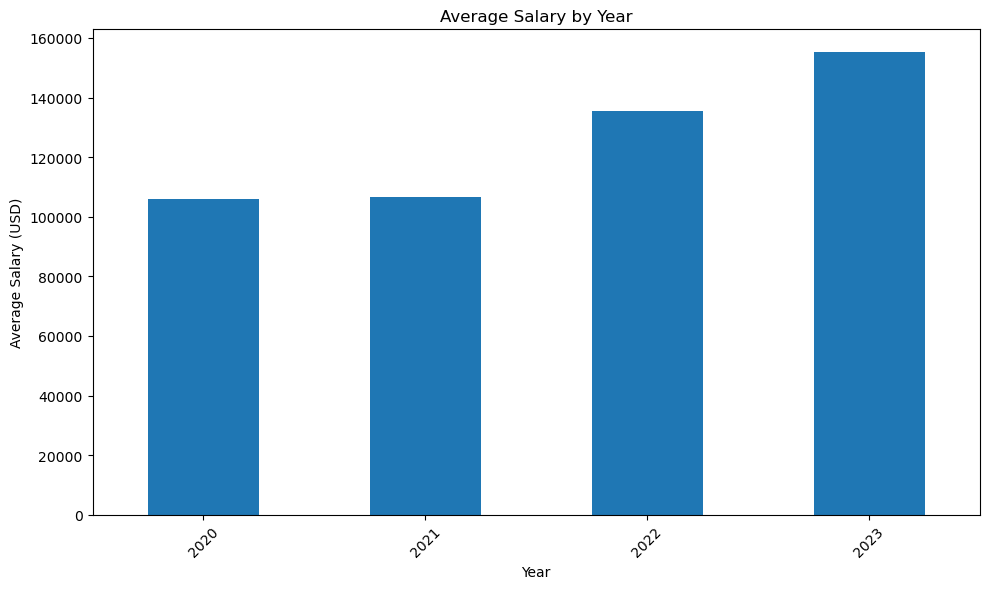

In [16]:
import matplotlib.pyplot as plt

# Group by work_year and calculate average salary
average_salary_by_year = df.groupby('work_year')['salary_in_usd'].mean()

# Plot the average salary by year
average_salary_by_year.plot(kind='bar', figsize=(10, 6))
plt.title('Average Salary by Year')
plt.xlabel('Year')
plt.ylabel('Average Salary (USD)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

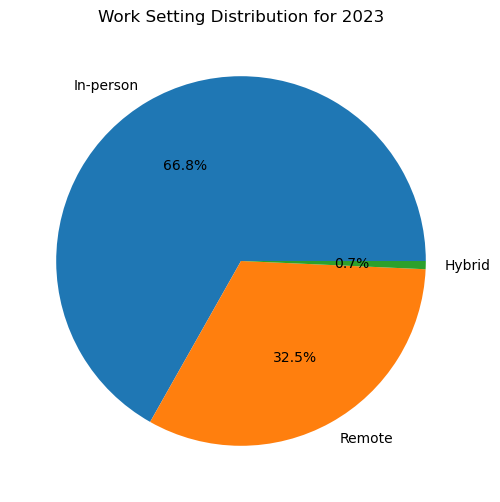

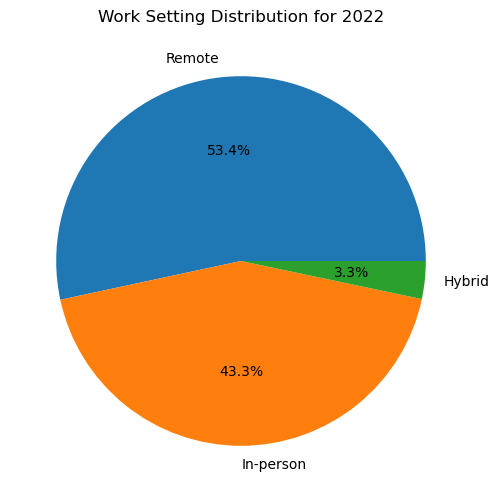

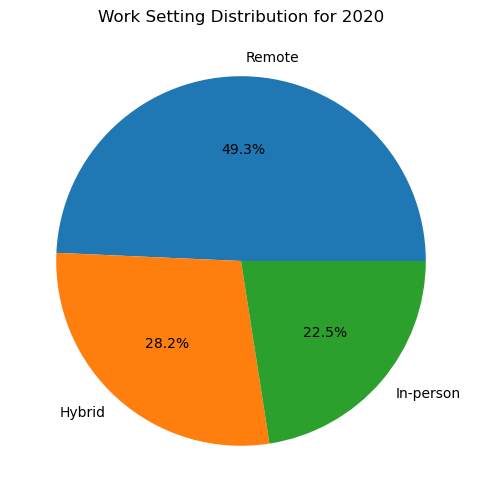

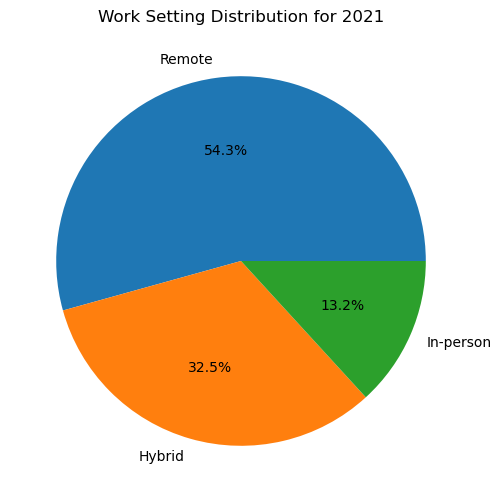

In [17]:
# Get the unique years in the dataset
years = df['work_year'].unique()

# Plot a pie chart for each year
for year in years:
    # Filter the DataFrame for the current year
    df_year = df[df['work_year'] == year]
    
    # Calculate the count of each work setting for the current year
    work_setting_counts = df_year['work_setting'].value_counts()
    
    # Plot the pie chart for the current year
    plt.figure(figsize=(6, 6))
    work_setting_counts.plot(kind='pie', autopct='%1.1f%%')
    plt.title(f'Work Setting Distribution for {year}')
    plt.ylabel('')
    plt.show()

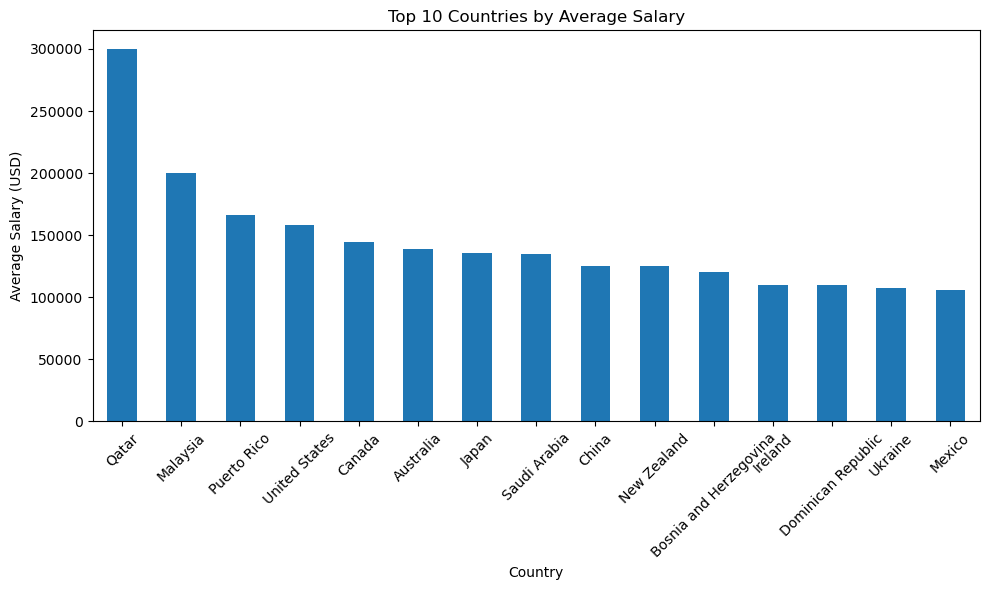

In [18]:
# Calculate the average salary for each employee residence
average_salary_by_residence = df.groupby('employee_residence')['salary_in_usd'].mean()

# Sort the average salary in descending order and select the top 10 countries
top_10_countries = average_salary_by_residence.sort_values(ascending=False).head(15)

# Plot the bar chart for the top 10 countries
top_10_countries.plot(kind='bar', figsize=(10, 6))
plt.title('Top 10 Countries by Average Salary')
plt.xlabel('Country')
plt.ylabel('Average Salary (USD)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

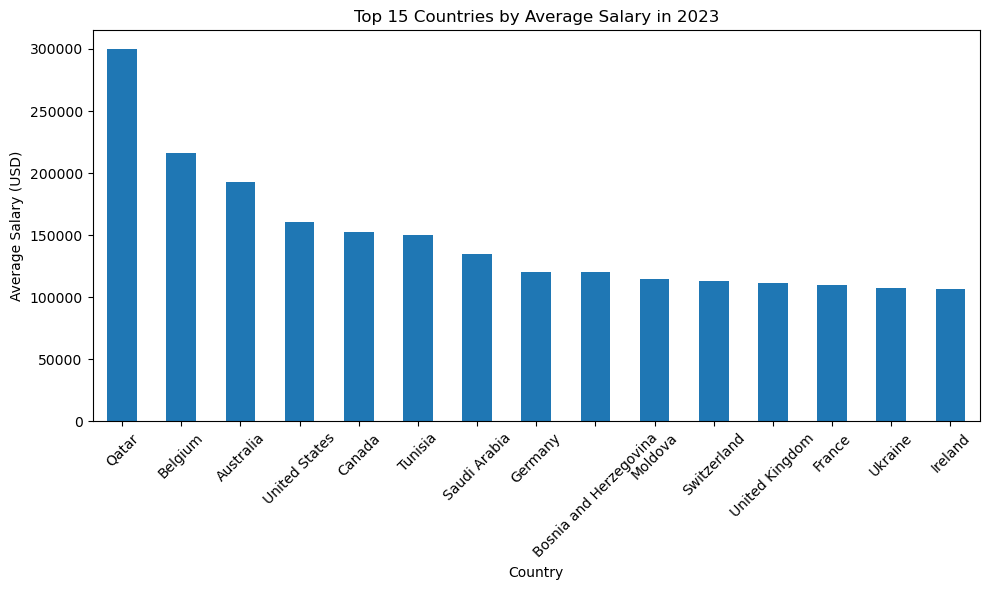

In [19]:
# Filter the data for the year 2023
df_2023 = df[df['work_year'] == 2023]

# Calculate the average salary for each employee residence
average_salary_by_residence_2023 = df_2023.groupby('employee_residence')['salary_in_usd'].mean()

# Sort the average salary in descending order and select the top 15 countries
top_15_countries_2023 = average_salary_by_residence_2023.sort_values(ascending=False).head(15)

# Plot the bar chart for the top 15 countries in 2023
top_15_countries_2023.plot(kind='bar', figsize=(10, 6))
plt.title('Top 15 Countries by Average Salary in 2023')
plt.xlabel('Country')
plt.ylabel('Average Salary (USD)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

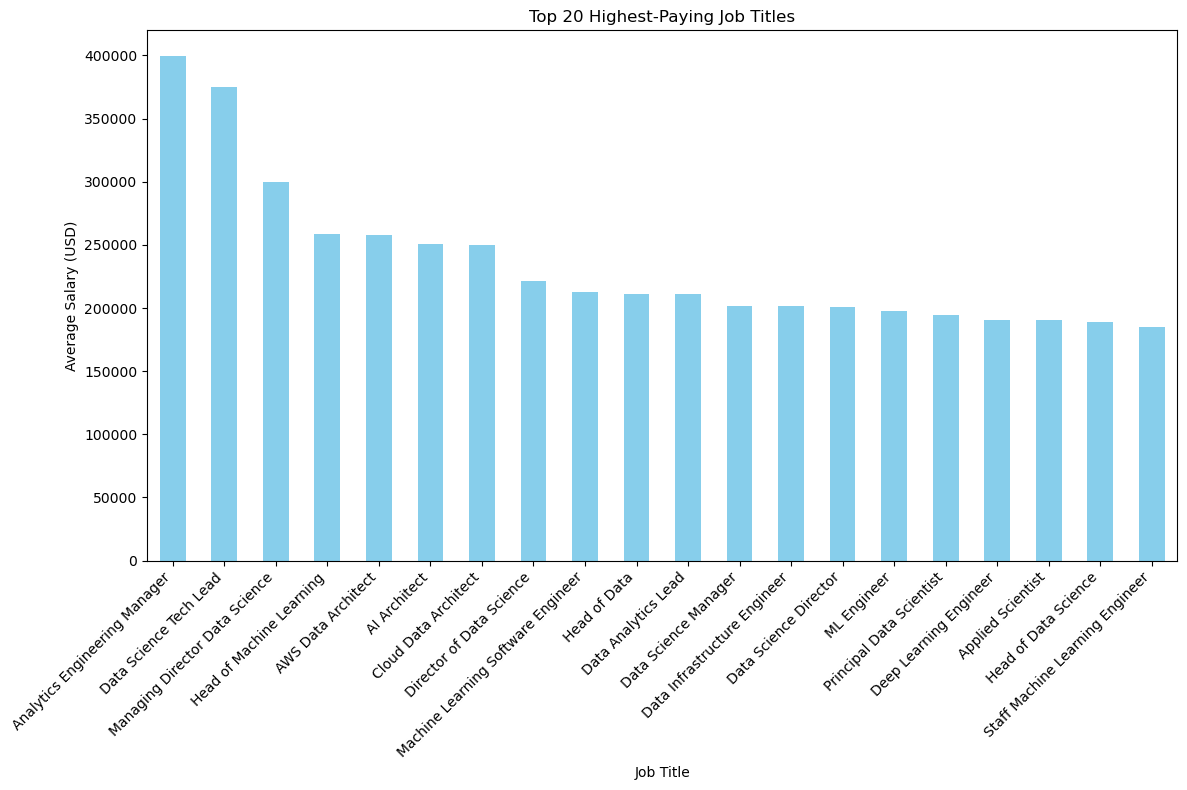

In [20]:
# Calculate the average salary for each job title
average_salary_by_job_title = df.groupby('job_title')['salary_in_usd'].mean()

# Sort the average salary in descending order and select the top ten job titles
top_ten_highest_paying_job_titles = average_salary_by_job_title.sort_values(ascending=False).head(20)

# Plot the bar chart
plt.figure(figsize=(12, 8))
top_ten_highest_paying_job_titles.plot(kind='bar', color='skyblue')
plt.title('Top 20 Highest-Paying Job Titles')
plt.xlabel('Job Title')
plt.ylabel('Average Salary (USD)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

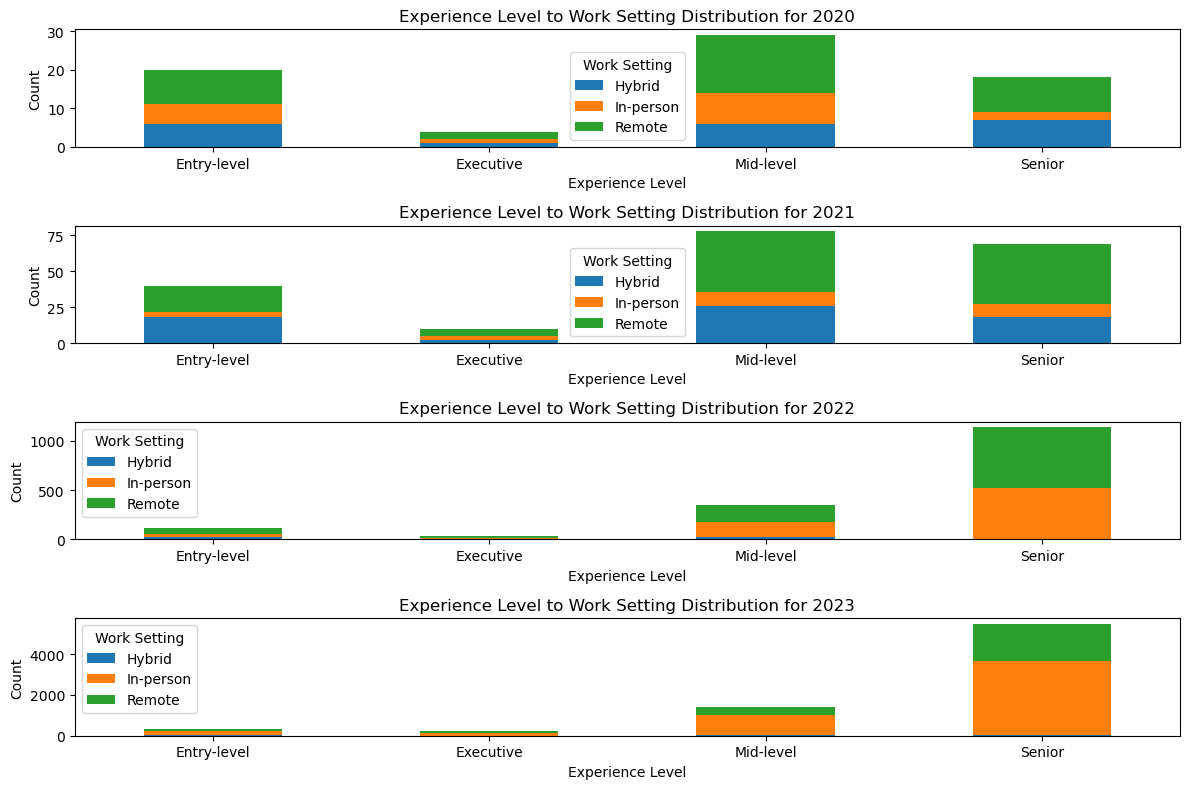

In [21]:
# Group data by year, experience level, and work setting, and count occurrences
grouped = df.groupby(['work_year', 'experience_level', 'work_setting']).size().unstack(fill_value=0)

# Plot stacked bar chart
fig, axes = plt.subplots(nrows=len(grouped.index.levels[0]), figsize=(12, 8))

for idx, year in enumerate(grouped.index.levels[0]):
    ax = grouped.loc[year].plot(kind='bar', stacked=True, ax=axes[idx], rot=0)
    ax.set_title(f'Experience Level to Work Setting Distribution for {year}')
    ax.set_xlabel('Experience Level')
    ax.set_ylabel('Count')
    ax.legend(title='Work Setting')

plt.tight_layout()
plt.show()

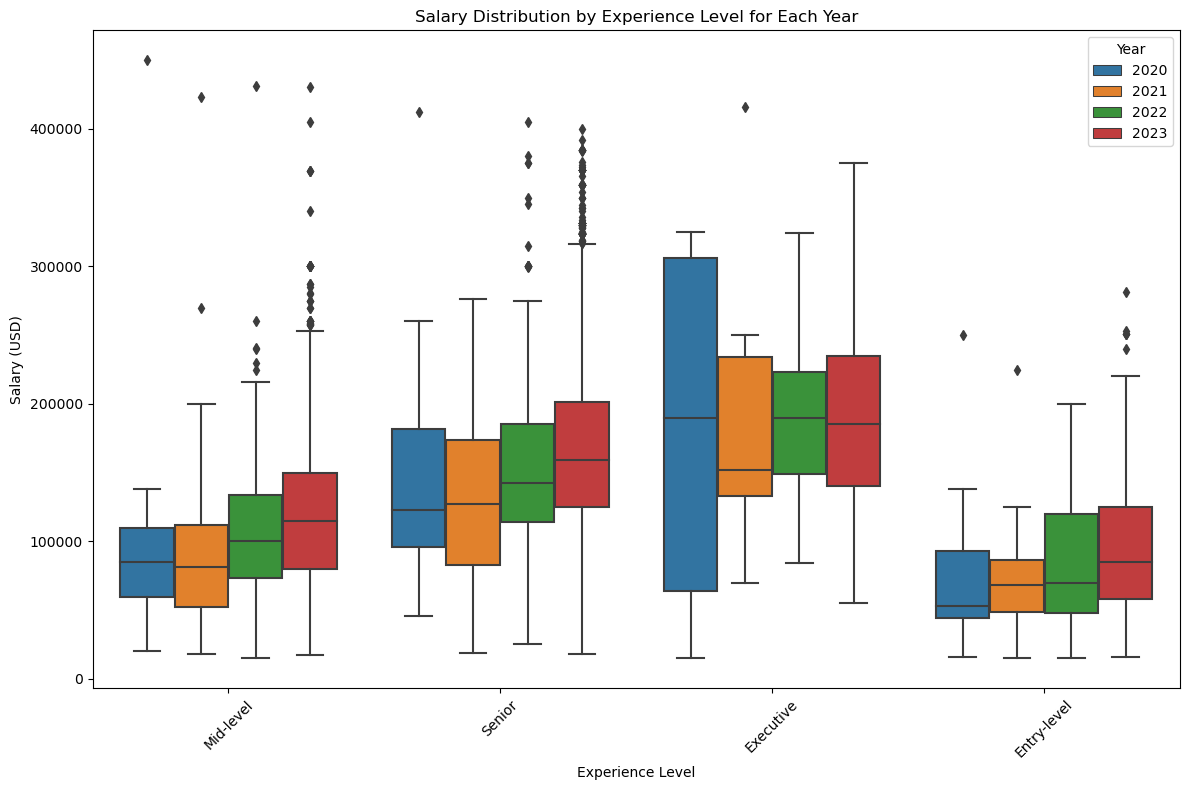

In [22]:
import seaborn as sns
# Plot box plot for salary distribution by experience level for each year
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, x='experience_level', y='salary_in_usd', hue='work_year')
plt.title('Salary Distribution by Experience Level for Each Year')
plt.xlabel('Experience Level')
plt.ylabel('Salary (USD)')
plt.legend(title='Year')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

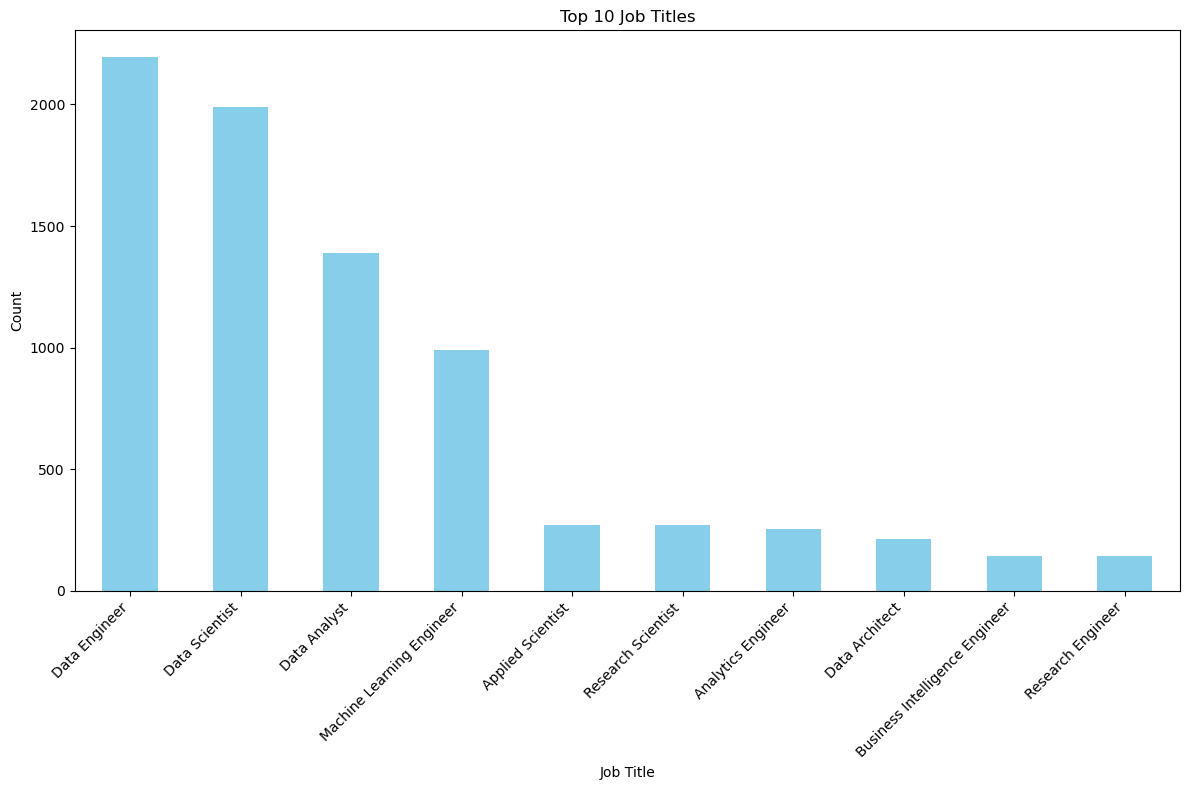

In [23]:
# Count the occurrences of each job title
job_title_counts = df['job_title'].value_counts().head(10)

# Plot the top 10 job titles
plt.figure(figsize=(12, 8))
job_title_counts.plot(kind='bar', color='skyblue')
plt.title('Top 10 Job Titles')
plt.xlabel('Job Title')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

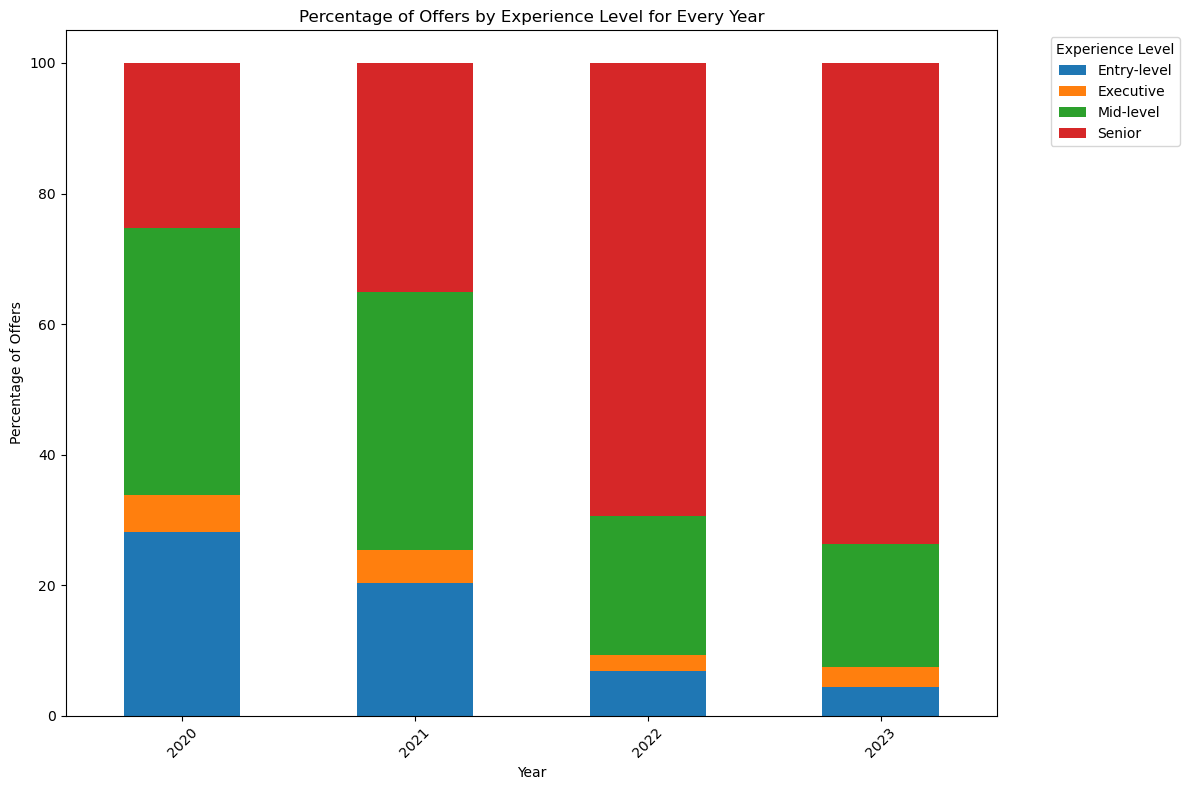

In [24]:

# Group by work_year and experience_level, and count the number of offers for each group
offers_by_year_experience = df.groupby(['work_year', 'experience_level']).size().unstack()

# Calculate the percentage of offers for each experience level within each year
percentage_offers_by_year_experience = offers_by_year_experience.div(offers_by_year_experience.sum(axis=1), axis=0) * 100

# Plot the grouped bar chart
percentage_offers_by_year_experience.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Percentage of Offers by Experience Level for Every Year')
plt.xlabel('Year')
plt.ylabel('Percentage of Offers')
plt.xticks(rotation=45)
plt.legend(title='Experience Level', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

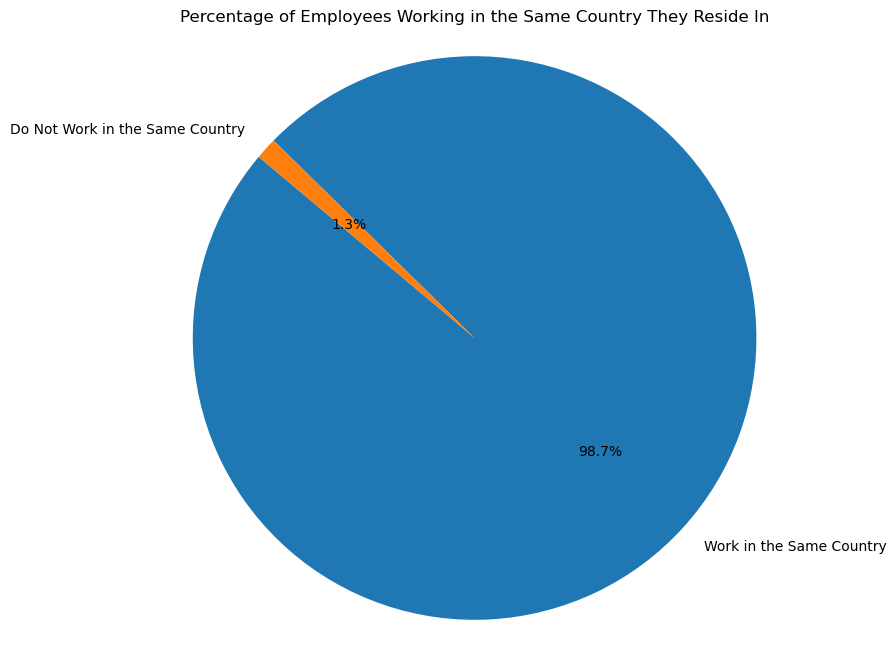

In [25]:
# Count the number of employees who work in the same country they reside in
same_country_count = (df['employee_residence'] == df['company_location']).sum()

# Calculate the number of employees who do not work in the same country they reside in
not_same_country_count = len(df) - same_country_count

# Create labels and counts for the pie chart
labels = ['Work in the Same Country', 'Do Not Work in the Same Country']
counts = [same_country_count, not_same_country_count]

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(counts, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Percentage of Employees Working in the Same Country They Reside In')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

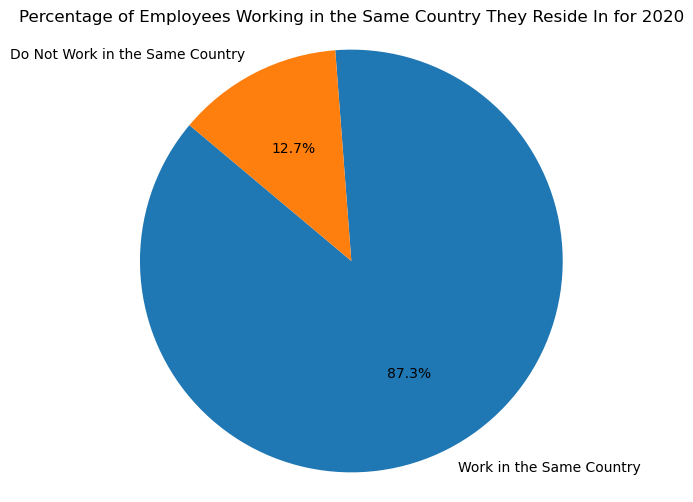

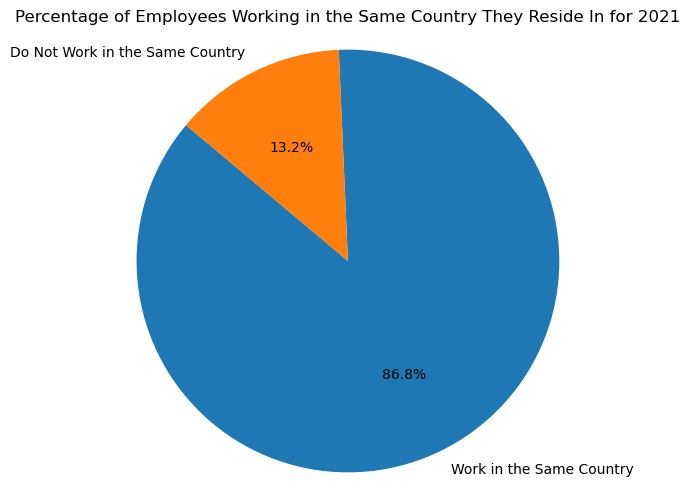

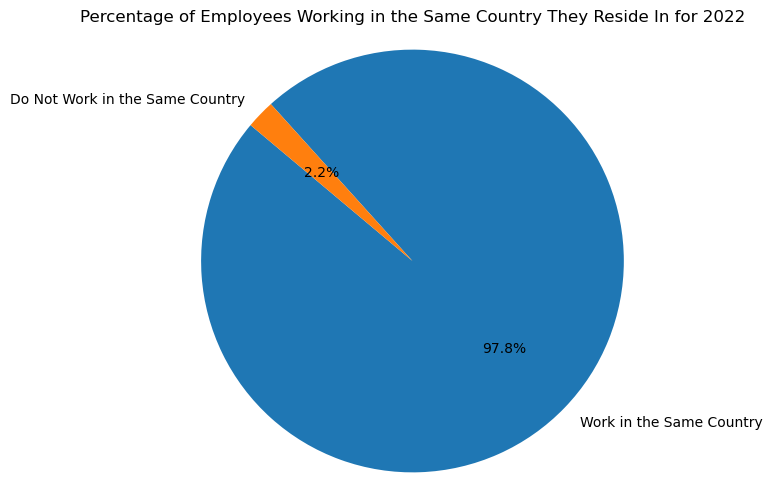

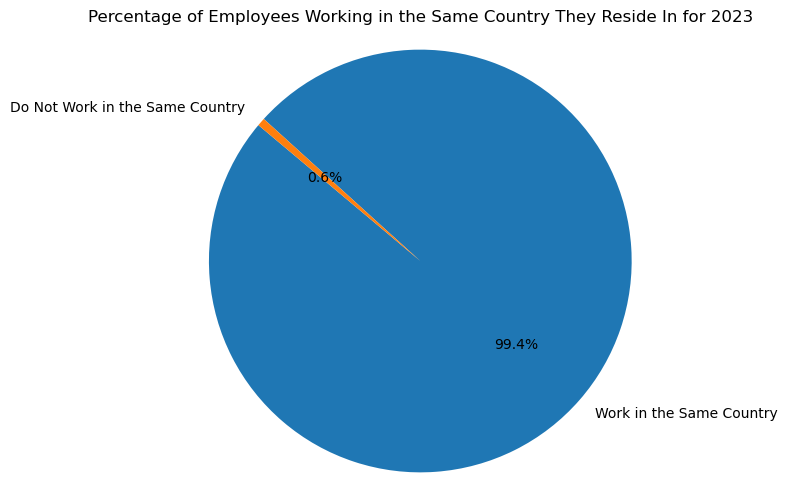

In [26]:
# Calculate the percentage of employees who work in the same country they reside in for each year
percentage_same_country_by_year = df.groupby('work_year').apply(lambda x: (x['employee_residence'] == x['company_location']).mean() * 100)

# Plot the pie chart for each year
for year, percentage in percentage_same_country_by_year.items():
    plt.figure(figsize=(6, 6))
    plt.pie([percentage, 100 - percentage], labels=['Work in the Same Country', 'Do Not Work in the Same Country'], autopct='%1.1f%%', startangle=140)
    plt.title(f'Percentage of Employees Working in the Same Country They Reside In for {year}')
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
    plt.show()

# Hypothesis

In [27]:
from scipy import stats
# Extract data for each company size category
small_companies = df[df['company_size'] == 'S']['salary_in_usd']
medium_companies = df[df['company_size'] == 'M']['salary_in_usd']
large_companies = df[df['company_size'] == 'L']['salary_in_usd']

# Perform ANOVA test
f_statistic, p_value = stats.f_oneway(small_companies, medium_companies, large_companies)

# Print the results
print("F-Statistic:", f_statistic)
print("P-Value:", p_value)

# Check if the null hypothesis can be rejected
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in salary between different company sizes.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in salary between different company sizes.")
    
    

F-Statistic: 84.2688906954835
P-Value: 5.34994108881328e-37
Reject the null hypothesis: There is a significant difference in salary between different company sizes.


In [28]:

# The F-statistic is a test statistic used in the analysis of variance (ANOVA) test.
# In the context of ANOVA, the F-statistic measures the ratio of the variation between groups to the variation within groups.

# In the specific case of comparing the means of salary between different company sizes (small, medium, and large),
# the F-statistic indicates whether there is a significant difference in salary among the groups. If the F-statistic 
#is large and the associated p-value is small (typically less than a chosen significance level, such as 0.05),
#it suggests that there is evidence to reject the null hypothesis, indicating that at least one group's mean salary
#is significantly different from the others.

# In summary, the F-statistic helps us assess whether the variation in salary between different company sizes 
#is large enough to be considered statistically significant. A larger F-statistic suggests a larger difference
#between the group means, while a smaller F-statistic suggests a smaller difference.